In [1]:
import pandas as pd

# Load in dataframe from filesystem
all_texts = pd.read_pickle("all_texts.pkl")

In [2]:
# Load in emoji_df

emoji_df = pd.read_csv("emoji_df.csv")

In [3]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-v0_8-deep')
plt.rcParams['font.family'] = 'Inter'

### *How many messages did I send versus how many were sent by others in each conversation?*

In [4]:
comparisons = (
    all_texts.assign(
        from_me=lambda df: df['is_from_me'].astype(int),
        from_others=lambda df: df['is_from_me'].ne(True).astype(int)
    )
    .groupby(['chat_identifier', 'is_group_chat'])
    .agg({'from_me': 'sum', 'from_others': 'sum'})
    .reset_index()
)

comparisons['total'] = comparisons['from_me'] + comparisons['from_others']
comparisons = comparisons.sort_values(by=['total'], ascending=False)

comparisons

,chat_identifier,is_group_chat,from_me,from_others,total
138,36c6485e,False,39869,53798,93667
335,87bf26ed,False,15672,16866,32538
154,3ee879f3,False,15175,13641,28816
461,bc97743a,False,13742,14865,28607
24,099c2ce0,False,9907,13100,23007
...,...,...,...,...,...
203,5354f7b7,False,0,1,1
202,530da225,False,1,0,1
425,ab220470,False,0,1,1
427,acf7071b,False,0,1,1


In [5]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [6]:
import matplotlib.pyplot as plt

# Calculating percentages
comparisons['from_me_percentage'] = (comparisons['from_me'] / comparisons['total']) * 100
comparisons['from_others_percentage'] = (comparisons['from_others'] / comparisons['total']) * 100

# Removing outliers
filtered_comparisons = remove_outliers(comparisons, 'from_others_percentage')
filtered_comparisons = remove_outliers(filtered_comparisons, 'from_me_percentage')
filtered_comparisons = filtered_comparisons[filtered_comparisons['total'] != 0]

filtered_comparisons

,chat_identifier,is_group_chat,from_me,from_others,total,from_me_percentage,from_others_percentage
138,36c6485e,False,39869,53798,93667,42.564617,57.435383
335,87bf26ed,False,15672,16866,32538,48.165222,51.834778
154,3ee879f3,False,15175,13641,28816,52.661716,47.338284
461,bc97743a,False,13742,14865,28607,48.037194,51.962806
24,099c2ce0,False,9907,13100,23007,43.060808,56.939192
...,...,...,...,...,...,...,...
30,0d75ac67,False,0,1,1,0.000000,100.000000
203,5354f7b7,False,0,1,1,0.000000,100.000000
425,ab220470,False,0,1,1,0.000000,100.000000
427,acf7071b,False,0,1,1,0.000000,100.000000


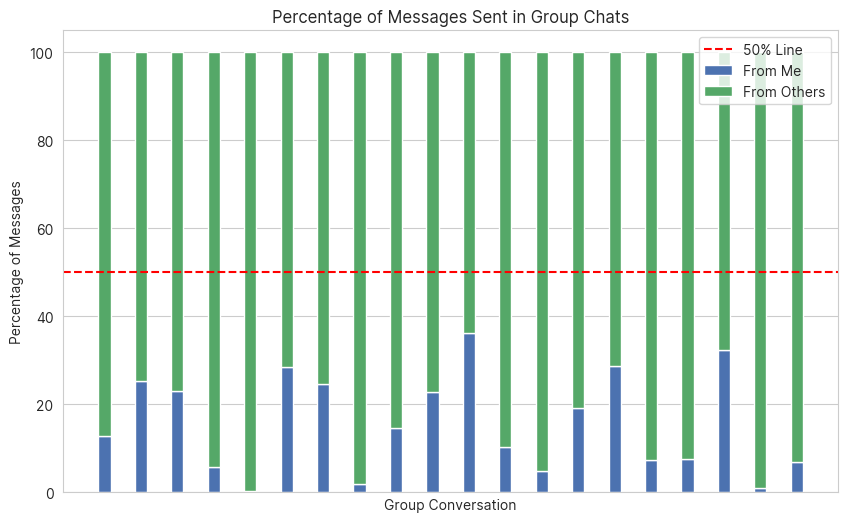

In [7]:
# Take top 20 group chats
group_chats = filtered_comparisons[filtered_comparisons['is_group_chat']][:20]

bar_width = 1/3.

n_bars_group = len(group_chats['chat_identifier'])
r1_group = range(n_bars_group)
r2_group = [x + bar_width for x in r1_group]

plt.figure(figsize=(10, 6))
plt.bar(r1_group, group_chats['from_me_percentage'], bar_width, label='From Me')
plt.bar(r1_group, group_chats['from_others_percentage'], bar_width, bottom=group_chats['from_me_percentage'], label='From Others')
plt.axhline(y=50, color='r', linestyle='--', label='50% Line')

plt.xlabel('Group Conversation')
plt.ylabel('Percentage of Messages')
plt.title('Percentage of Messages Sent in Group Chats')
plt.legend()
plt.xticks([])
plt.show()

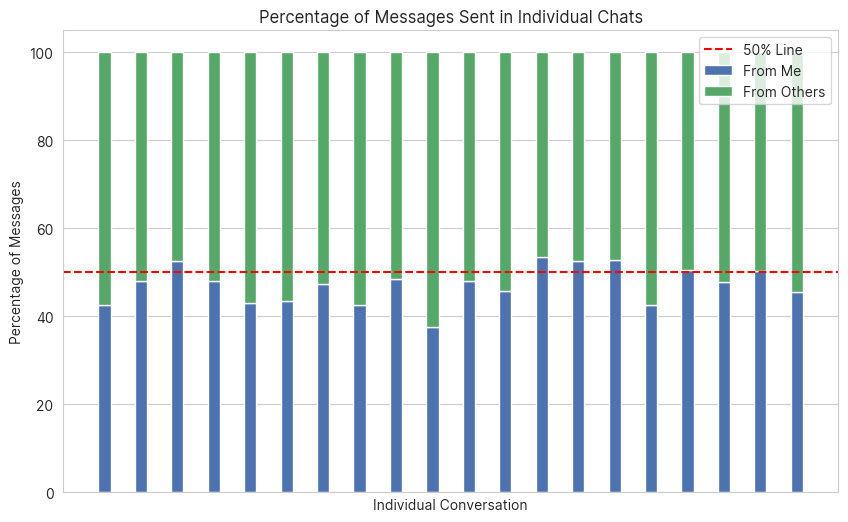

,chat_identifier,is_group_chat,from_me,from_others,total,from_me_percentage,from_others_percentage
138,36c6485e,False,39869,53798,93667,42.564617,57.435383
335,87bf26ed,False,15672,16866,32538,48.165222,51.834778
154,3ee879f3,False,15175,13641,28816,52.661716,47.338284
461,bc97743a,False,13742,14865,28607,48.037194,51.962806
24,099c2ce0,False,9907,13100,23007,43.060808,56.939192
111,2af6cedf,False,7369,9537,16906,43.588075,56.411925
336,87c38a5d,False,7118,7909,15027,47.368071,52.631929
64,1b85ac4d,False,2703,3644,6347,42.587049,57.412951
243,6347d7d7,False,2762,2940,5702,48.439144,51.560856
491,c7d1d255,False,1576,2606,4182,37.685318,62.314682


In [8]:
# Take top 20 individual chats
individual_chats = filtered_comparisons[filtered_comparisons['is_group_chat'] == False][:20]

bar_width = 1/3.

n_bars_group = len(individual_chats['chat_identifier'])
r1_group = range(n_bars_group)
r2_group = [x + bar_width for x in r1_group]

plt.figure(figsize=(10, 6))
plt.bar(r1_group, individual_chats['from_me_percentage'], bar_width, label='From Me')
plt.bar(r1_group, individual_chats['from_others_percentage'], bar_width, bottom=individual_chats['from_me_percentage'], label='From Others')
plt.axhline(y=50, color='r', linestyle='--', label='50% Line')

plt.xlabel('Individual Conversation')
plt.ylabel('Percentage of Messages')
plt.title('Percentage of Messages Sent in Individual Chats')
plt.legend()
plt.xticks([])
plt.show()

individual_chats

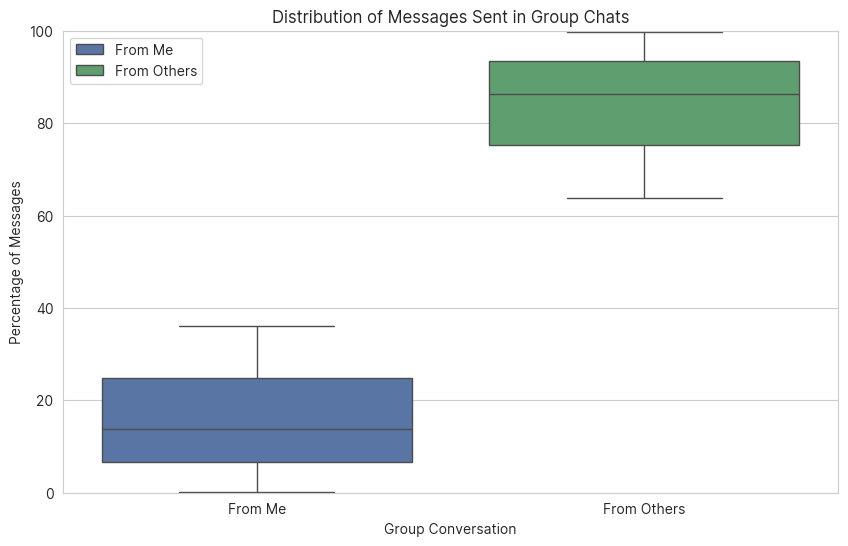

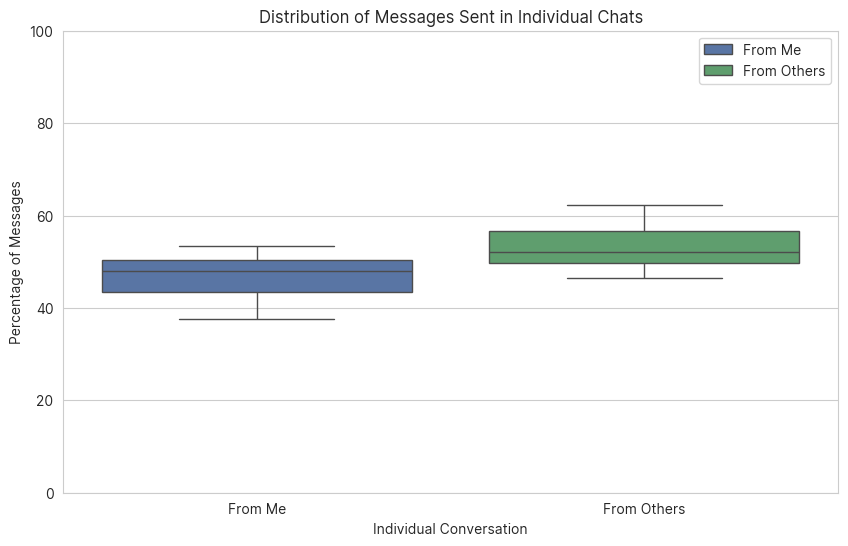

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure for the group chats
plt.figure(figsize=(10, 6))
sns.boxplot(data=group_chats[['from_me_percentage', 'from_others_percentage']])
plt.xlabel('Group Conversation')
plt.ylabel('Percentage of Messages')
plt.title('Distribution of Messages Sent in Group Chats')
plt.xticks([0, 1], ['From Me', 'From Others'])
plt.legend(['From Me', 'From Others'])
plt.ylim(0, 100)
plt.show()

# Create a figure for the individual chats
plt.figure(figsize=(10, 6))
sns.boxplot(data=individual_chats[['from_me_percentage', 'from_others_percentage']])
plt.xlabel('Individual Conversation')
plt.ylabel('Percentage of Messages')
plt.title('Distribution of Messages Sent in Individual Chats')
plt.xticks([0, 1], ['From Me', 'From Others'])
plt.legend(['From Me', 'From Others'])
plt.ylim(0, 100)
plt.show()

From these graphs, it's clear that in most group conversations, others send the majority of the messages, while my contributions are relatively lower. My participation varies significantly across different group chats, with some showing minimal input from me and a few where I engage more.

In individual conversations, the messaging distribution is more balanced; there are several instances where I contribute as much or even more than the other person. This indicates that I tend to be more interactive or reciprocal in one-on-one chats.

Altogether, these insights reveal that others are generally more active in group conversations, while I play a more balanced or active role in individual conversations. This understanding can help me adjust my engagement levels if I want to become more active in group chats.

### *What are my most used emojis?*

In [30]:
import numpy as np

def power_law(x, a, b):
    return a * np.power(x, -b)

def r_squared(y_observed, y_predicted):
    ss_res = np.sum((y_observed - y_predicted) ** 2)
    ss_tot = np.sum((y_observed - np.mean(y_observed)) ** 2)
    return 1 - (ss_res / ss_tot)

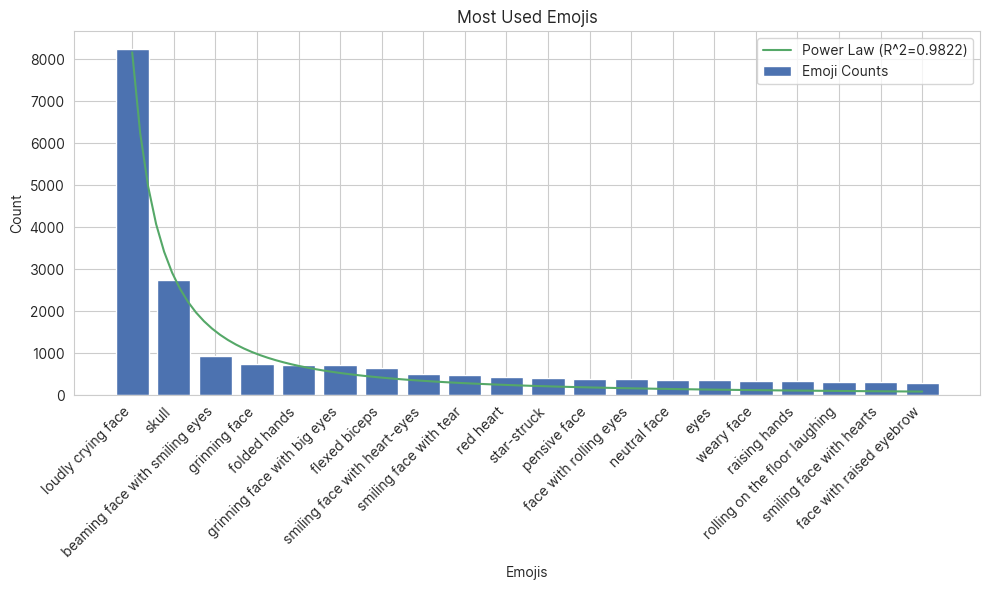

In [47]:
from collections import Counter
from scipy.optimize import curve_fit

# Count the most common emojis
all_emojis = [emoji for sublist in all_texts['emojis'] for emoji in sublist]
emoji_counts = Counter(all_emojis)
most_common_emojis = emoji_counts.most_common(20)

# Prepare data for plotting
emoji_labels, emoji_values = zip(*most_common_emojis)

# Replace emojis with English names
emoji_names_dict = pd.Series(emoji_df.name.values, index=emoji_df.emoji).to_dict()
emoji_labels = [emoji_names_dict[emoji] for emoji in emoji_labels]

# Create best-fit line data
x_data = np.arange(1, len(emoji_values) + 1)
popt_pow, _ = curve_fit(power_law, x_data, emoji_values)

# Calculate R-squared values
y_pred_pow = power_law(x_data, *popt_pow)
r2_pow = r_squared(emoji_values, y_pred_pow)

# Generate fitted values with accurate x-values
x_fit = np.linspace(1, len(emoji_values), 100)
y_fit_pow = power_law(x_fit, *popt_pow)

# Plot the data and the accurately fitted lines
plt.figure(figsize=(10, 6))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.bar(x_data, emoji_values, tick_label=emoji_labels, color=colors[0], label='Emoji Counts')
plt.plot(x_fit, y_fit_pow, color=colors[1], label=f'Power Law (R^2={r2_pow:.4f})')

plt.title('Most Used Emojis')
plt.xlabel('Emojis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

### Temporal Analyses

In [32]:
# Extract hour and weekday from the timestamp
all_texts['hour'] = all_texts['timestamp'].dt.hour
all_texts['weekday'] = all_texts['timestamp'].dt.dayofweek

# Group by hour and weekday to find peak messaging times
hourly_counts = all_texts.groupby('hour').size()
weekly_counts = all_texts.groupby('weekday').size()

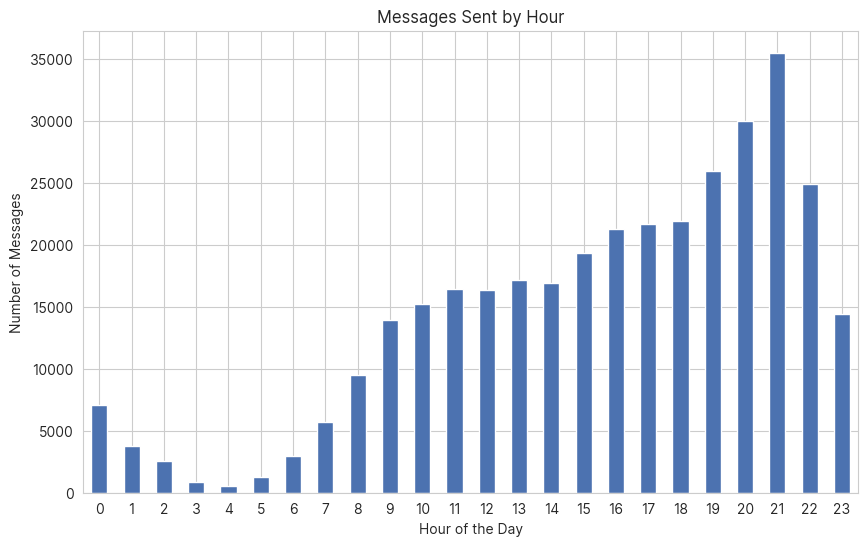

In [13]:
# Hourly peak times
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar')
plt.title('Messages Sent by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)
plt.show()

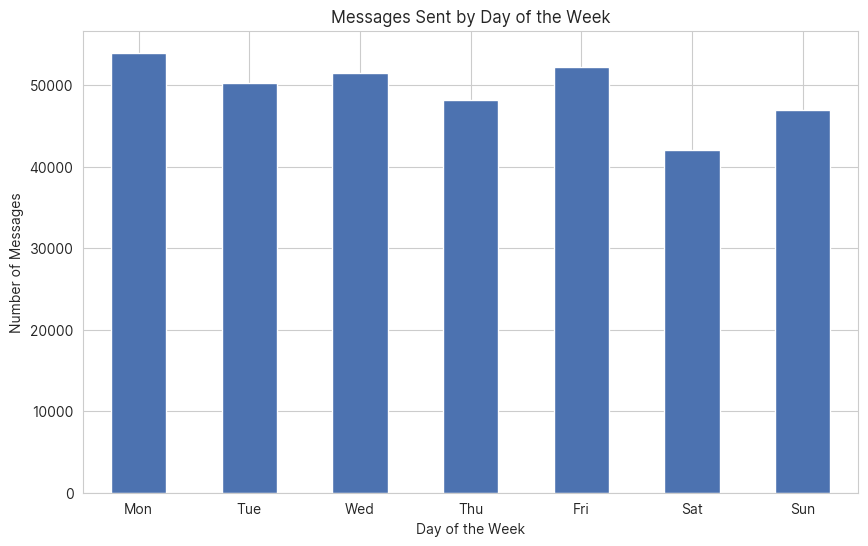

In [14]:
# Weekly peak times
plt.figure(figsize=(10, 6))
weekly_counts.plot(kind='bar')
plt.title('Messages Sent by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Messages')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

In [15]:
from matplotlib.colors import LinearSegmentedColormap

# Extract the first two colors from the current matplotlib color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:2]

# Create a custom colormap from the extracted colors
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

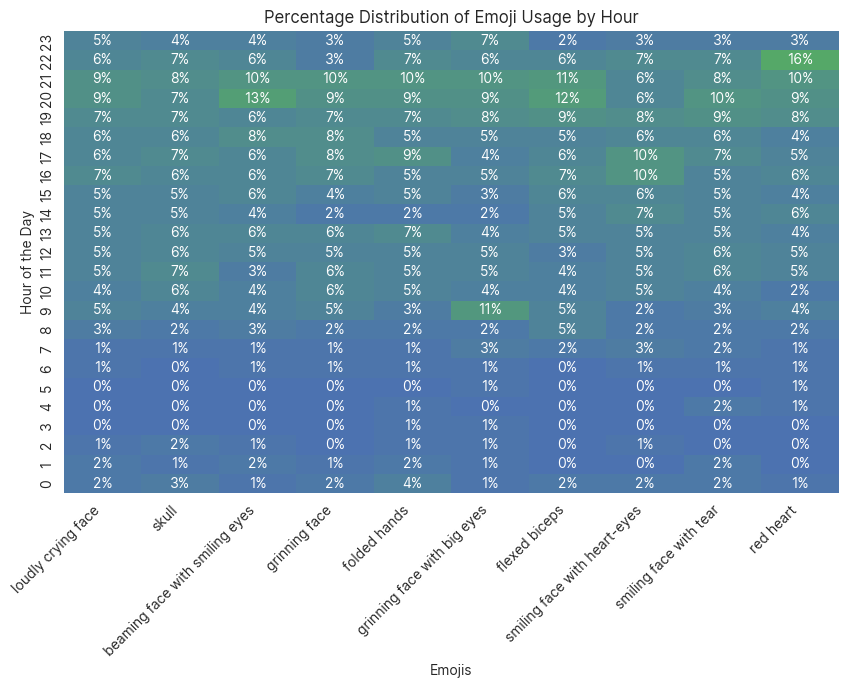

In [16]:
import seaborn as sns

# Explode the emojis column to have one emoji per row
all_texts_exploded = all_texts.explode('emojis')

# Group by hour and emoji, and count occurrences
emoji_counts = all_texts_exploded.groupby(['hour', 'emojis']).size().unstack(fill_value=0)

# Calculate percentage of each emoji sent at different hours
emoji_percentage = emoji_counts.div(emoji_counts.sum(axis=0), axis=1) * 100
emoji_percentage = emoji_percentage.round().astype(int)

# Select top N emojis
top_n_emojis = 10
top_emojis = emoji_counts.sum().nlargest(top_n_emojis).index
emoji_percentage_top = emoji_percentage[top_emojis]

# Replace emojis with english names
emoji_names_dict = pd.Series(emoji_df.name.values, index=emoji_df.emoji).to_dict()
emoji_percentage_top.columns = [emoji_names_dict[emoji] for emoji in emoji_percentage_top.columns]

# Plot heatmap
plt.figure(figsize=(10, 6))

ax = sns.heatmap(emoji_percentage_top, cmap=custom_cmap, cbar=False, annot=True, fmt='')
for t in ax.texts:
    t.set_text(t.get_text() + "%")

# Invert y-axis
plt.gca().invert_yaxis()

plt.title('Percentage Distribution of Emoji Usage by Hour')
plt.xlabel('Emojis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Hour of the Day')
plt.show()

/var/folders/cj/2g_361zd52gff3mw9lrrzxhm0000gn/T/ipykernel_43756/1731871408.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  filtered_texts['month'] = filtered_texts['timestamp'].dt.to_period('M')


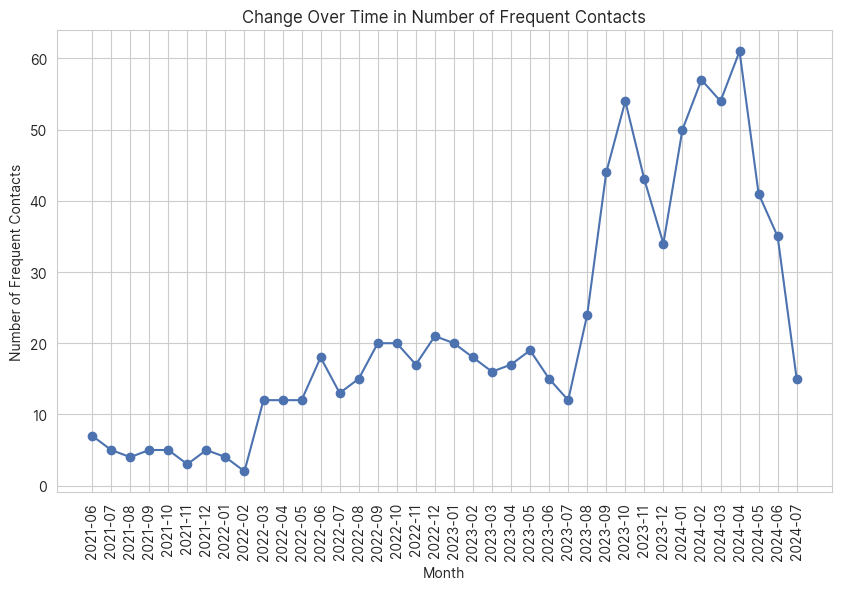

In [35]:
def get_frequent_contacts(group, threshold=0):
    contact_counts = group['chat_identifier'].value_counts()
    return contact_counts[contact_counts >= threshold].index

# Filter texts to only include texts from me that aren't in a group chat
filtered_texts = all_texts[all_texts['is_group_chat'] == False]
filtered_texts = filtered_texts[filtered_texts['is_from_me']]

# Step 3: Group by month and apply the function
filtered_texts['month'] = filtered_texts['timestamp'].dt.to_period('M')
frequent_contacts = filtered_texts.groupby('month', group_keys=True).apply(lambda group: get_frequent_contacts(group), include_groups=False)

# Step 4: Create a DataFrame to count unique frequent contacts per month
frequent_contacts_count = frequent_contacts.explode().reset_index()
frequent_contacts_count.columns = ['month', 'recipient']
frequent_contacts_count = frequent_contacts_count.groupby('month').nunique()['recipient'].reset_index()
frequent_contacts_count.columns = ['month', 'count']

# Step 5: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(frequent_contacts_count['month'].astype(str), frequent_contacts_count['count'], marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Frequent Contacts')
plt.title('Change Over Time in Number of Frequent Contacts')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

It's pretty interesting to see how this graph correlates to different parts of my life:

- The lull near the end of 2021 was likely due to sheerly how busy I was the first semester of my junior year between classes, soccer, and extracurriculars. Didn't have much time for communication apparently!
- I started becoming a better texter around second semester junior year, as indicated by the jump in frequent contacts.
- The brief slump from June 2022 through around October 2022 matches the pattern during the same time period in 2021.
- The most notable spike in this chart, occurring around the middle of 2023, matches up perfectly when I started college! I gained a lot of new friends and as a result I started texting many more people more frequently. The decrease nearing the middle of 2024 matches up with when clubs and classes start to wind down for the summer.

### Sentiment Analysis

In [18]:
!pip install nltk 


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [19]:
import os
import certifi
import nltk

# Fix SSL issue
os.environ['SSL_CERT_FILE'] = certifi.where()

# Download necessary NLTK data files
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/colegawin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(message):
    return sid.polarity_scores(message)

# Apply the sentiment analysis function to each message
all_texts['sentiment_scores'] = all_texts['clean_text'].apply(get_sentiment_scores)

# Extract compound score and label it as positive, negative, or neutral
all_texts['compound'] = all_texts['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])
all_texts['sentiment'] = all_texts['compound'].apply(lambda c: 'positive' if c >= 0.05 else ('negative' if c <= -0.05 else 'neutral'))

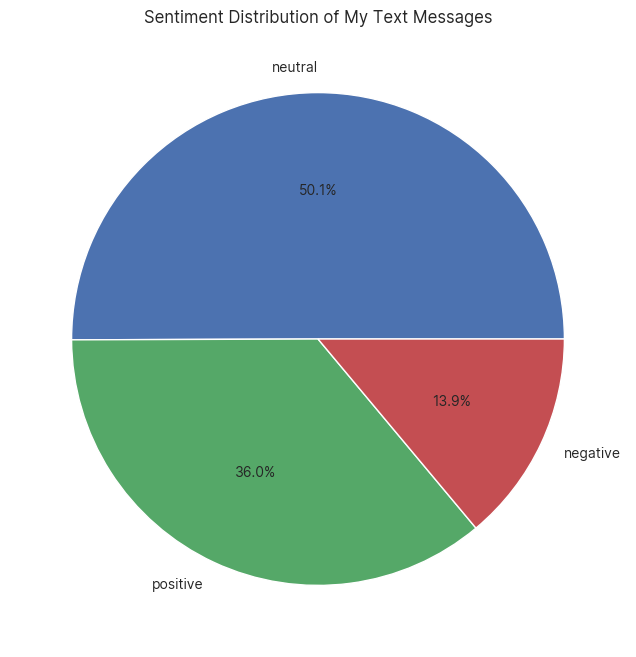

In [48]:
my_sentiments_counts = all_texts[all_texts['is_from_me']]['sentiment'].value_counts(normalize=True) * 100
my_sentiments_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, figsize=(8, 8))
plt.title('Sentiment Distribution of My Text Messages')
plt.ylabel('')
plt.show()

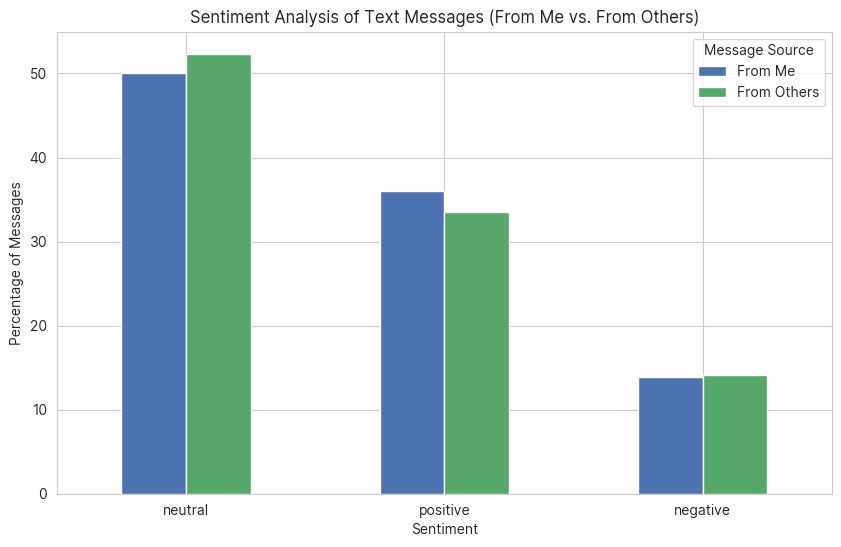

In [37]:
# Count the number of each sentiment for texts from me vs. from others
sentiments_from_me = all_texts[all_texts['is_from_me']]
sentiments_from_others = all_texts[all_texts['is_from_me'] == False]

# Create a DataFrame for plotting
sentiment_counts_df = pd.DataFrame({
    'From Me': sentiments_from_me['sentiment'].value_counts(normalize=True) * 100,
    'From Others': sentiments_from_others['sentiment'].value_counts(normalize=True) * 100
}).fillna(0)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plot the sentiment counts
sentiment_counts_df.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Sentiment Analysis of Text Messages (From Me vs. From Others)')
plt.xlabel('Sentiment')
plt.ylabel('Percentage of Messages')
plt.xticks(rotation=0)
plt.legend(title='Message Source')
plt.show()

*Is there a statistical difference in how positive I am vs. how positive others are?*

In [22]:
!pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [23]:
from statsmodels.stats.proportion import proportions_ztest

# Calculate the number of positive messages in both groups
positive_from_me = sum(sentiments_from_me['sentiment'] == 'positive')
positive_not_from_me = sum(sentiments_from_others['sentiment'] == 'positive')

# Calculate the total number of messages in both groups
total_from_me = len(sentiments_from_me)
total_from_others = len(sentiments_from_others)

# Perform two-proportion z-test
count = np.array([positive_from_me, positive_not_from_me])
nobs = np.array([total_from_me, total_from_others])
stat, pval = proportions_ztest(count, nobs)

f"Z-statistic: {stat}, P-value: {pval}, Alpha: {0.05}"

'Z-statistic: 15.165590710410953, P-value: 5.97588349543933e-52, Alpha: 0.05'

Since the calculated P-value is less than the significance threshold ($\alpha = 0.05$), there is a statistical difference!

Interesting how on average I'm more positive in my texts!